In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from statsmodels.graphics.factorplots import interaction_plot

In [23]:
!pip3 install pingouin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.4/185.4 kB 2.8 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 4.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 7.7 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 947.6/947.6 kB 4.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 3.5 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
Using legacy 'setup.py install' for pingouin, since package 'wheel' is not installed.
Using legacy 'setup.py install' for littleutils, since package 'wheel' is not installed.
  Running setup.py install for littleutils ... done
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.2
    Uninstalling scikit-learn-1.1.2:
      Successfully uninstalled scikit-learn-1.1.2
  Running setup.py install for pingouin ... done

[notice] A new re

In [3]:
#muestra de jugadores de la liga seleccionados aleatoriamente, su posición en el equipo y su bateo. 
posicion = ["OF", "IF", "IF", "OF", "IF", "IF", "OF", "OF", "IF", "IF", "OF",
            "OF", "IF", "OF", "IF", "IF", "IF", "OF", "IF", "OF", "IF", "OF",
            "IF", "OF", "IF", "DH", "IF", "IF", "IF", "OF", "IF", "IF", "IF",
            "IF", "OF", "IF", "OF", "IF", "IF", "IF", "IF", "OF", "OF", "IF",
            "OF", "OF", "IF", "IF", "OF", "OF", "IF", "OF", "OF", "OF", "IF",
            "DH", "OF", "OF", "OF", "IF", "IF", "IF", "IF", "OF", "IF", "IF",
            "OF", "IF", "IF", "IF", "OF", "IF", "IF", "OF", "IF", "IF", "IF",
            "IF", "IF", "IF", "OF", "DH", "OF", "OF", "IF", "IF", "IF", "OF",
            "IF", "OF", "IF", "IF", "IF", "IF", "OF", "OF", "OF", "DH", "OF",
            "IF", "IF", "OF", "OF", "C", "IF", "OF", "OF", "IF", "OF", "IF",
            "IF", "IF", "OF", "C", "OF", "IF", "C", "OF", "IF", "DH", "C", "OF",
            "OF", "IF", "C", "IF", "IF", "IF", "IF", "IF", "IF", "OF", "C", "IF",
            "OF", "OF", "IF", "OF", "IF", "OF", "DH", "C", "IF", "OF", "IF",
            "IF", "OF", "IF", "OF", "IF", "C", "IF", "IF", "OF", "IF", "IF",
            "IF", "OF", "OF", "OF", "IF", "IF", "C", "IF", "C", "C", "OF", "OF",
            "OF", "IF", "OF", "IF", "C", "DH", "DH", "C", "OF", "IF", "OF", "IF",
            "IF", "IF", "C", "IF", "OF", "DH", "IF", "IF", "IF", "OF", "OF", "C",
            "OF", "OF", "IF", "IF", "OF", "OF", "OF", "OF", "OF", "OF", "IF",
            "IF", "DH", "OF", "IF", "IF", "OF", "IF", "IF", "IF", "IF", "OF",
            "IF", "C", "IF", "IF", "C", "IF", "OF", "IF", "DH", "C", "OF", "C",
            "IF", "IF", "OF", "C", "IF", "IF", "IF", "C", "C", "C", "OF", "OF",
            "IF", "IF", "IF", "IF", "OF", "OF", "C", "IF", "IF", "OF", "C", "OF",
            "OF", "OF", "OF", "OF", "OF", "OF", "OF", "OF", "OF", "OF", "C",
            "IF", "DH", "IF", "C", "DH", "C", "IF", "C", "OF", "C", "C", "IF",
            "OF", "IF", "IF", "IF", "IF", "IF", "IF", "IF", "IF", "OF", "OF",
            "OF", "IF", "OF", "OF", "IF", "IF", "IF", "OF", "C", "IF", "IF",
            "IF", "IF", "OF", "OF", "IF", "OF", "IF", "OF", "OF", "OF", "IF",
            "OF", "OF", "IF", "OF", "IF", "C", "IF", "IF", "C", "DH", "OF", "IF",
            "C", "C", "IF", "C", "IF", "OF", "C", "C", "OF"]

bateo = [0.359, 0.34, 0.33, 0.341, 0.366, 0.333, 0.37, 0.331, 0.381, 0.332,
         0.365, 0.345, 0.313, 0.325, 0.327, 0.337, 0.336, 0.291, 0.34, 0.31,
         0.365, 0.356, 0.35, 0.39, 0.388, 0.345, 0.27, 0.306, 0.393, 0.331,
         0.365, 0.369, 0.342, 0.329, 0.376, 0.414, 0.327, 0.354, 0.321, 0.37,
         0.313, 0.341, 0.325, 0.312, 0.346, 0.34, 0.401, 0.372, 0.352, 0.354,
         0.341, 0.365, 0.333, 0.378, 0.385, 0.287, 0.303, 0.334, 0.359, 0.352,
         0.321, 0.323, 0.302, 0.349, 0.32, 0.356, 0.34, 0.393, 0.288, 0.339,
         0.388, 0.283, 0.311, 0.401, 0.353, 0.42, 0.393, 0.347, 0.424, 0.378,
         0.346, 0.355, 0.322, 0.341, 0.306, 0.329, 0.271, 0.32, 0.308, 0.322,
         0.388, 0.351, 0.341, 0.31, 0.393, 0.411, 0.323, 0.37, 0.364, 0.321,
         0.351, 0.329, 0.327, 0.402, 0.32, 0.353, 0.319, 0.319, 0.343, 0.288,
         0.32, 0.338, 0.322, 0.303, 0.356, 0.303, 0.351, 0.325, 0.325, 0.361,
         0.375, 0.341, 0.383, 0.328, 0.3, 0.277, 0.359, 0.358, 0.381, 0.324,
         0.293, 0.324, 0.329, 0.294, 0.32, 0.361, 0.347, 0.317, 0.316, 0.342,
         0.368, 0.319, 0.317, 0.302, 0.321, 0.336, 0.347, 0.279, 0.309, 0.358,
         0.318, 0.342, 0.299, 0.332, 0.349, 0.387, 0.335, 0.358, 0.312, 0.307,
         0.28, 0.344, 0.314, 0.24, 0.331, 0.357, 0.346, 0.351, 0.293, 0.308,
         0.374, 0.362, 0.294, 0.314, 0.374, 0.315, 0.324, 0.382, 0.353, 0.305,
         0.338, 0.366, 0.357, 0.326, 0.332, 0.323, 0.306, 0.31, 0.31, 0.333,
         0.34, 0.4, 0.389, 0.308, 0.411, 0.278, 0.326, 0.335, 0.316, 0.371,
         0.314, 0.384, 0.379, 0.32, 0.395, 0.347, 0.307, 0.326, 0.316, 0.341,
         0.308, 0.327, 0.337, 0.36, 0.32, 0.372, 0.306, 0.305, 0.347, 0.281,
         0.281, 0.296, 0.306, 0.343, 0.378, 0.393, 0.337, 0.327, 0.336, 0.32,
         0.381, 0.306, 0.358, 0.311, 0.284, 0.364, 0.315, 0.342, 0.367, 0.307,
         0.351, 0.372, 0.304, 0.296, 0.332, 0.312, 0.437, 0.295, 0.316, 0.298,
         0.302, 0.342, 0.364, 0.304, 0.295, 0.305, 0.359, 0.335, 0.338, 0.341,
         0.3, 0.378, 0.412, 0.273, 0.308, 0.309, 0.263, 0.291, 0.359, 0.352,
         0.262, 0.274, 0.334, 0.343, 0.267, 0.321, 0.3, 0.327, 0.313, 0.316,
         0.337, 0.268, 0.342, 0.292, 0.39, 0.332, 0.315, 0.298, 0.298, 0.331,
         0.361, 0.272, 0.287, 0.34, 0.317, 0.327, 0.354, 0.317, 0.311, 0.174,
         0.302, 0.302, 0.291, 0.29, 0.268, 0.352, 0.341, 0.265, 0.307, 0.36,
         0.305, 0.254, 0.279, 0.321, 0.305, 0.35, 0.308, 0.326, 0.219, 0.23,
         0.322, 0.405, 0.321, 0.291, 0.312, 0.357, 0.324]

         
datos = pd.DataFrame({'posicion': posicion, 'bateo': bateo})
datos.head(4)

,posicion,bateo
0,OF,0.359
1,IF,0.340
2,IF,0.330
3,OF,0.341


In [5]:
#agrupar por numero de observaciones por posición 
datos.groupby('posicion').size()

posicion
C      39
DH     14
IF    154
OF    120
dtype: int64

In [8]:
#obtener la media y la desviación estándar de cada grupo de posición 
datos.groupby('posicion').agg(['mean', 'std'])

bateo          
              mean       std
posicion                    
C         0.322615  0.045132
DH        0.347786  0.036037
IF        0.331526  0.037095
OF        0.334250  0.029444

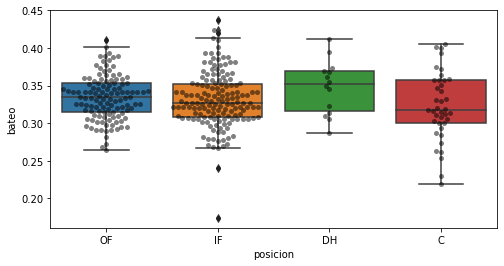

In [9]:
#análisis gráfico
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
sns.boxplot(x="posicion", y="bateo", data=datos, ax=ax)
sns.swarmplot(x="posicion", y="bateo", data=datos, color='black', alpha = 0.5, ax=ax);
#El tamaño de las cajas es similar para todos los niveles por lo que no hay indicios de falta de homocedasticidad. 

In [28]:
pg.anova(data=datos, dv='bateo', between='posicion', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,posicion,0.007557,3,0.002519,1.994349,0.114693,0.018186
1,Within,0.407984,323,0.001263,NaN,NaN,NaN


#EJEMPLO2

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

In [30]:
#DATOS
subject = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
           21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

sex = ["female", "male", "male", "female", "male", "male", "male", "female",
       "female", "male", "male", "male", "male", "female", "female", "female",
       "male", "female", "female", "male", "male", "female", "male", "male",
       "male", "male", "male", "male", "female", "male"]

age = ["adult", "adult", "adult", "adult", "adult", "adult", "young", "young",
       "adult", "young", "young", "adult", "young", "young", "young", "adult",
       "young", "adult", "young", "young", "young", "young", "adult", "young",
       "young", "young", "young", "young", "young", "adult"]

result = [7.1, 11.0, 5.8, 8.8, 8.6, 8.0, 3.0, 5.2, 3.4, 4.0, 5.3, 11.3, 4.6, 6.4,
          13.5, 4.7, 5.1, 7.3, 9.5, 5.4, 3.7, 6.2, 10.0, 1.7, 2.9, 3.2, 4.7, 4.9,
          9.8, 9.4]

datos = pd.DataFrame({
    'subject': subject,
    'sex': sex,
    'age': age,
    'result': result
})

datos.head()

,subject,sex,age,result
0,1,female,adult,7.1
1,2,male,adult,11.0
2,3,male,adult,5.8
3,4,female,adult,8.8
4,5,male,adult,8.6


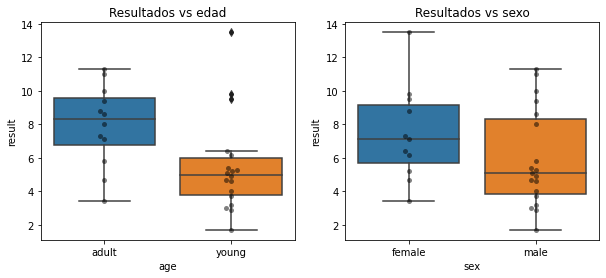

In [31]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].set_title('Resultados vs edad')
sns.boxplot(x="age", y="result", data=datos, ax=axs[0])
sns.swarmplot(x="age", y="result", data=datos, color='black',
              alpha = 0.5, ax=axs[0])

axs[1].set_title('Resultados vs sexo')
sns.boxplot(x="sex", y="result", data=datos, ax=axs[1])
sns.swarmplot(x="sex", y="result", data=datos, color='black',
              alpha = 0.5, ax=axs[1]);

In [32]:
print('Resultados medios y desviación típica por edad')
datos.groupby('age')['result'].agg(['mean', 'std'])

Resultados medios y desviación típica por edad


,mean,std
age,,
adult,7.950000,2.431049
young,5.505556,2.871047


In [33]:
print('Resultados medios y desviación típica por sexo')
datos.groupby('sex')['result'].agg(['mean', 'std'])

Resultados medios y desviación típica por sexo


,mean,std
sex,,
female,7.445455,2.828202
male,5.926316,2.906858


In [34]:
print('Resultados medios y desviación típica por edad y sexo')
datos.groupby(['age', 'sex'])['result'].agg(['mean', 'std'])

Resultados medios y desviación típica por edad y sexo


mean       std
age   sex                       
adult female  6.260000  2.170944
      male    9.157143  1.900752
young female  8.433333  3.106552
      male    4.041667  1.157158

A partir de la representación gráfica y el cálculo de las medias se puede intuir que existe una diferencia en el efecto del fármaco dependiendo de la edad y también del sexo. El efecto parece ser mayor en mujeres que en hombres y en adultos que en jóvenes, si bien la significancia se tendrá que confirmar con el ANOVA. La distribución de las observaciones de cada nivel parece simétrica con la presencia de un único valor atípico. A priori parece que se satisfacen las condiciones necesarias para un ANOVA, aunque habrá que confirmarlas estudiando los residuos.

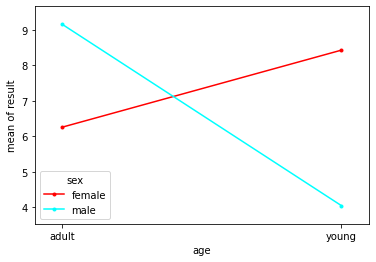

In [35]:
# Gráfico de interacciones
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.age,
    trace    = datos.sex,
    response = datos.result,
    ax       = ax,
)

Se observa una clara interacción entre ambos factores. La respuesta al fármaco es distinta entre adultos y jóvenes, y de tendencia inversa dependiendo del sexo. En mujeres, la respuesta es mayor cuando son jóvenes que cuando son adultas y en hombres mayor cuando son adultos y menor cuando son jóvenes. El ANOVA confirmará si las diferencias observadas son significativas.

In [36]:
# Test ANOVA de dos vías (Two-way ANOVA)
# ==============================================================================
pg.anova(
    data     = datos,
    dv       = 'result',
    between  = ['sex', 'age'],
    detailed = True
).round(4)

,Source,SS,DF,MS,F,p-unc,np2
0,sex,12.0164,1.0,12.0164,3.0183,0.0942,0.1040
1,age,38.9611,1.0,38.9611,9.7862,0.0043,0.2735
2,sex * age,89.6114,1.0,89.6114,22.5085,0.0001,0.4640
3,Residual,103.5116,26.0,3.9812,NaN,NaN,NaN


El análisis de varianza no encuentra diferencias significativas en el efecto del fármaco entre hombres y mujeres (factor sex) pero sí encuentra diferencias significativas entre jóvenes y adultos y entre al menos dos grupos de las combinaciones de sexo y edad, es decir, hay significancia para la interacción. El tamaño del efecto  𝜂2
η
2
  es grande tanto para edad como para la interacción de edad y sexo.

Nota: en este caso, el orden en el que se multiplican los factores sí afecta a los resultados puesto que el tamaño de los grupos no es igual. 
